In [1]:
import numpy as np
import torch

seed = 42 #424
np.random.seed(seed)
torch.manual_seed(seed)
#NOTE! This only works for non cudnn. gpu needs
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

from helpers import showcase_code

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# for working with external files, otherwise kernels needs to be restarted each time
%load_ext autoreload
%autoreload 2


# Measures

## NLPD

## Error

## cobeau
 
## coverage ?

## distance from 'optimally informed Tsomething' (DOIT)


# experiment

## setup



### toy problem
parameters were obtained via non-exhaustive gridsearch, since the performance on the error is not the most important metric, the other metrics were not optimized for.

#### 100 times per model:


for i in range experiment:
  seed = f(i)
  model = new_model(seed=f(i))
  model.fit(X_train,y_train)
  outcomes = model.get_uncertainty(X_test,y_test)
  measures.append(get_measures(outcomes))
  
stats = mean/std(measures)
  
#### comparisson models:

##### optimal model

##### mean/std model

### kaggle problem


#### 100 times per model:


for i in range experiment:
  seed = f(i)
  model = new_model(seed=f(i))
  model.fit(X_train,y_train)
  outcomes = model.get_uncertainty(X_test,y_test)
  measures.append(get_measures(outcomes))
  
stats = mean/std(measures)

In [3]:
showcase_code('measures.py',showcase=True)

# Toy Problem

In [4]:
from data_loaders import get_X_y, generate_y
toy = True
from measures import compute_cobeau, compute_nlpd, compute_error

from helpers import plot_uncertainty

In [27]:
num_epochs = 2000
num_experiments = 10
from nn_models.models import SaverModel, BobstrapEnsemble
from nn_models.base_ensemble import VanillaEnsemble

iters = 100
l2 = 1
n_std = 4

In [28]:
from experimentation import Experimentator

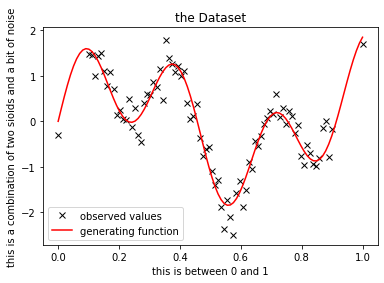

In [29]:
exp = Experimentator(num_experiments,num_epochs,VanillaEnsemble,toy,seed=seed,generator_function = generate_y)

In [ ]:
exp.run_experiment()

__init__() got an unexpected keyword argument 'save_path'


In [ ]:
exp.plot_outcomes()

In [ ]:
exp.analysis()

In [ ]:
exp.plot_distribution_of_metrics()

In [ ]:
exp.plot_models()

In [ ]:
exp.plot_models('cobeau')

In [ ]:
exp.plot_models('nlpd')

In [ ]:
exp.stupid_function_error

In [ ]:
len(exp.stats_dict['analysis']['cobeau'])

In [ ]:
len(exp.stats_dict['models'])

In [ ]:
np.argmin(exp.stats_dict['analysis']['cobeau'])

In [ ]:
exp.stats_dict['analysis']['cobeau']

In [ ]:
np.argmax([1,2,3])

# data analysis



In [ ]:
test_string = "<class 'nn_models.models.SaverModel'>"

In [ ]:
index_start = test_string.find('.models.')+len('.models.')
index_stop = test_string.find("'>")
new_string = test_string[index_start:index_stop]

In [ ]:
new_string = test_string[index_start:index_stop]

In [ ]:
new_string

In [ ]:
type(SaverModel)

In [ ]:
f'{SaverModel}'